In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\syeon\\!soyeon\\archive\\train_df.csv")

In [3]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
data_cat = ohe.fit_transform(df[['center_type']])
df_center = pd.concat([df.drop(columns=['center_type']),pd.DataFrame(data_cat, columns=['center_type_' + str(col) for col in ohe.categories_[0]])], axis=1)

data_cat = ohe.fit_transform(df[['category']])
df_category = pd.concat([df_center.drop(columns=['category']),pd.DataFrame(data_cat, columns=['category_' + str(col) for col in ohe.categories_[0]])], axis=1)

data_cat = ohe.fit_transform(df[['cuisine']])
train_df = pd.concat([df_category.drop(columns=['cuisine']),pd.DataFrame(data_cat, columns=['cuisine_' + str(col) for col in ohe.categories_[0]])], axis=1)

train_df

,id,week,center_id,city_code,region_code,op_area,meal_id,checkout_price,base_price,emailer_for_promotion,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,647,56,2.0,1885,136.83,152.29,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1466964,1,55,647,56,2.0,1993,136.83,135.83,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1346989,1,55,647,56,2.0,2539,134.86,135.86,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1338232,1,55,647,56,2.0,2139,339.50,437.53,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1448490,1,55,647,56,2.0,2631,243.50,242.50,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,473,77,4.5,1543,484.09,484.09,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
456544,1062036,145,61,473,77,4.5,2304,482.09,482.09,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
456545,1110849,145,61,473,77,4.5,2664,237.68,321.07,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
456546,1147725,145,61,473,77,4.5,2569,243.50,313.34,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# features와 target 분리
X = train_df.drop('num_orders', axis=1)
y = train_df['num_orders']

In [6]:
# train, test를 8:2로 나누기
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
# 5개를 임포트하세요 (Dense, tf, seauential, Modelcheckpoint)
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
# x의 입력 갯수 확인
train_x.shape

(365238, 32)

In [16]:
#모델 정의 및 입력 (4개의 입력 받아, n개의 퍼셉트론 구성된 레이어 제작)
model_dl = tf.keras.Sequential()
model_dl.add(tf.keras.layers.Dense(128, activation = 'relu', input_shape = [32]))

In [17]:
#덴스레이어 쌓기 (relu 또는 swish)
model_dl.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_dl.add(tf.keras.layers.Dense(32, activation = 'relu'))
model_dl.add(tf.keras.layers.Dense(16, activation = 'relu'))
model_dl.add(tf.keras.layers.Dense(8, activation = 'relu'))

In [18]:
#마지막 출력 레이어 확인 (리그레션이라 없음)
model_dl.add(tf.keras.layers.Dense(1))

In [19]:
# 컴파일 지정하기
optimizer = tf.keras.optimizers.RMSprop()
model_dl.compile(optimizer,
                 loss = 'mse',
                 metrics = ['mse', 'mae'])

In [20]:
model_dl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 15,233
Trainable params: 15,233
Non-trai

In [21]:
# 학습 실시 (hist = )
hist = model_dl.fit(train_x, train_y, epochs = 100, validation_data = (test_x, test_y))

Epoch 1/100
11414/11414 [==============================] - 32s 3ms/step - loss: 350304.6250 - mse: 350304.6250 - mae: 291.5761 - val_loss: 219815.0625 - val_mse: 219815.0625 - val_mae: 251.9837
Epoch 2/100
11414/11414 [==============================] - 31s 3ms/step - loss: 218171.0156 - mse: 218171.0156 - mae: 247.8486 - val_loss: 214401.3750 - val_mse: 214401.3750 - val_mae: 241.9808
Epoch 3/100
11414/11414 [==============================] - 31s 3ms/step - loss: 212855.3125 - mse: 212855.3125 - mae: 238.5798 - val_loss: 209248.1562 - val_mse: 209248.1562 - val_mae: 233.4241
Epoch 4/100
11414/11414 [==============================] - 29s 3ms/step - loss: 207812.2031 - mse: 207812.2031 - mae: 230.7502 - val_loss: 204355.3594 - val_mse: 204355.3594 - val_mae: 226.0824
Epoch 5/100
11414/11414 [==============================] - 30s 3ms/step - loss: 203029.4844 - mse: 203029.4844 - mae: 224.1004 - val_loss: 199724.6562 - val_mse: 199724.6562 - val_mae: 220.1055
Epoch 6/100
11414/11414 [=====

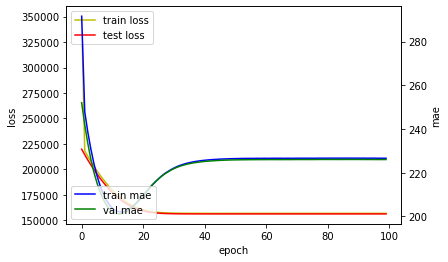

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

acc_ax.plot(hist.history['mae'], 'b', label='train mae')
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mae')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [23]:
# 최적 시점 저장하기 위해  my_checkpoint.ckpt 를 통해 가장 최적 포인트가 저장함.
checkpoint_path = "my_checkpoint.ckpt"

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_weights_only=True, save_best_only=True, mointor='val_loss',verbose = 1)


# 새로운 콜백으로 모델 훈련하기
hist = model_dl.fit(train_x, train_y, epochs = 100, validation_data = (test_x, test_y), callbacks = [cp_callback])


Epoch 1/100
11406/11414 [============================>.] - ETA: 0s - loss: 156840.6875 - mse: 156840.6875 - mae: 226.6292
Epoch 1: val_loss improved from inf to 156320.43750, saving model to my_checkpoint.ckpt
11414/11414 [==============================] - 28s 2ms/step - loss: 156870.4219 - mse: 156870.4219 - mae: 226.6376 - val_loss: 156320.4375 - val_mse: 156320.4375 - val_mae: 226.0233
Epoch 2/100
11408/11414 [============================>.] - ETA: 0s - loss: 156905.2188 - mse: 156905.2188 - mae: 226.6413
Epoch 2: val_loss improved from 156320.43750 to 156320.39062, saving model to my_checkpoint.ckpt
11414/11414 [==============================] - 28s 2ms/step - loss: 156870.5938 - mse: 156870.5938 - mae: 226.6358 - val_loss: 156320.3906 - val_mse: 156320.3906 - val_mae: 226.0280
Epoch 3/100
11408/11414 [============================>.] - ETA: 0s - loss: 156885.1875 - mse: 156885.1875 - mae: 226.6307
Epoch 3: val_loss improved from 156320.39062 to 156320.15625, saving model to my_chec

In [24]:
# 가중치 로드
model_dl.load_weights(checkpoint_path)

# 모델 재평가
loss = model_dl.evaluate(test_x, test_y, verbose = 2)

2854/2854 - 4s - loss: 156319.9375 - mse: 156319.9375 - mae: 226.0559 - 4s/epoch - 1ms/step


In [25]:
# y = .predict
val_pred = model_dl.predict(test_x)

2854/2854 [==============================] - 4s 1ms/step


In [26]:
# mse 구하기
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, val_pred, squared = False)
mse

395.3736043722298

In [27]:
print("RMSE :", mse **0.5)

RMSE : 19.884003730944876


In [28]:
# r2 구하기
from sklearn.metrics import r2_score
r2_score(test_y, val_pred)

-1.5068502203785528e-05